In [1]:
import os
import pandas as pd
import numpy as np
import glob
from tqdm import tqdm
from scipy.io import wavfile
from scipy import signal
import soundfile as sf
os.chdir('../src/')
import config
import hashlib
import utils
import matplotlib.pyplot as plt
from utils import get_smarties
%matplotlib inline


/usr/local/lib/python2.7/dist-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [20]:
len(pd.read_csv(config.DATA_FOLDER + 'gt_train.csv'))

67093

In [2]:
audio_path = config.DATA_FOLDER +  'train/audio/'

subFolderList = []
for x in os.listdir(audio_path):
    if os.path.isdir(audio_path + '/' + x):
        if '_background_noise_' not in x:
            subFolderList.append(x)
        
train_audio = []
train_files = []
labels = []
total = 0

dict_ = {}

for sub in subFolderList:
    
    # get all the wave files
    all_files = [y for y in os.listdir(audio_path + sub) if '.wav' in y]
    labels += [sub] * len(all_files)
    train_files += all_files
    train_audio += [audio_path  + sub + '/'+ x for x in all_files]


In [3]:
train = pd.DataFrame({'file_name' : train_files, 'labels':labels})
train['person_id'] = train['file_name'].apply(lambda x: x.split('_')[0])

In [4]:
train.groupby(['person_id', 'labels']).count().reset_index().groupby(['person_id'])['file_name'].count().mean()

18.927698032961192

In [22]:
audio_path = config.DATA_FOLDER +  'train/audio/'

subFolderList = []
for x in os.listdir(audio_path):
    if os.path.isdir(audio_path + '/' + x):
        if '_background_noise_' not in x:
            subFolderList.append(x)

sample_audio = []
total = 0

dict_ = {}

for sub in subFolderList:
    # get all the wave files
    all_files = [y for y in os.listdir(audio_path + sub) if '.wav' in y]
    sample_audio += [audio_path + sub + '/' + x for x in all_files]

In [6]:
len(sample_audio)

64721

In [11]:
def log_specgram(audio, sample_rate, window_size=20,
                 step_size=10, eps=1e-10):
    nperseg = int(round(window_size * sample_rate / 1e3))
    noverlap = int(round(step_size * sample_rate / 1e3))
    freqs, _, spec = signal.spectrogram(audio,
                                    fs=sample_rate,
                                    window='hann',
                                    nperseg=nperseg,
                                    noverlap=noverlap,
                                    detrend=False)
    return freqs, np.log(spec.T.astype(np.float32) + eps)

In [29]:
shapes = []
for s in tqdm(sample_audio):
    filepath = s
    samplerate, test_sound  = wavfile.read(filepath)
    _, spectrogram = log_specgram(test_sound, samplerate)
    shapes.append(spectrogram.shape)
#     plt.imshow(spectrogram, aspect='auto', origin='lower')


100%|██████████| 158538/158538 [25:11<00:00, 104.87it/s]


In [39]:
len(test_sound)

16000

noize

In [74]:
wav_speed_tune.shape

(15999,)

('speed rate: 1.018', '(lower is faster)')
('wav length: ', 16000)


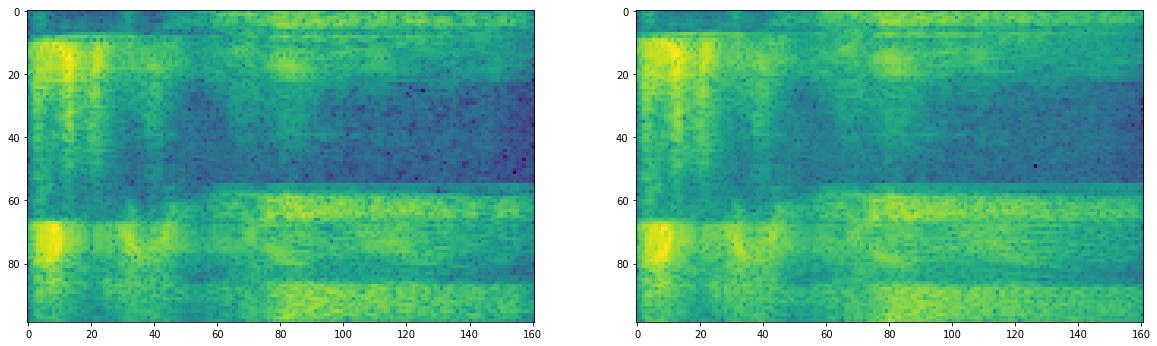

In [79]:
samplerate, wav  = wavfile.read(filepath)

speed_rate = np.random.uniform(0.7,1.3)
wav_speed_tune = cv2.resize(wav, (1, int(len(wav) * speed_rate))).squeeze()
print('speed rate: %.3f' % speed_rate, '(lower is faster)')
if len(wav_speed_tune) < 16000:
    pad_len = 16000 - len(wav_speed_tune)
    wav_speed_tune = np.r_[np.random.uniform(-0.001,0.001,int(pad_len/2)),
                           wav_speed_tune,
                           np.random.uniform(-0.001,0.001,int(np.ceil(pad_len/2)))]
else: 
    cut_len = len(wav_speed_tune) - 16000
    wav_speed_tune = wav_speed_tune[int(cut_len/2):int(cut_len/2)+16000]
print('wav length: ', wav_speed_tune.shape[0])
_, zz = log_specgram(wav_speed_tune, samplerate)

f,ax = plt.subplots(1,2,figsize = (20,12))
ax[0].imshow(spectrogram)
ax[1].imshow(zz)
    


In [7]:
# samplerate, wav  = wavfile.read()
noise_files = glob.glob(config.DATA_FOLDER + 'train/audio/_background_noise_/*.wav')

In [85]:
sum_ = 0
for nf in noise_files:
    samplerate, wav  = wavfile.read(nf)
    sum_ +=len(wav) / float(16000)
sum_

399.3981875

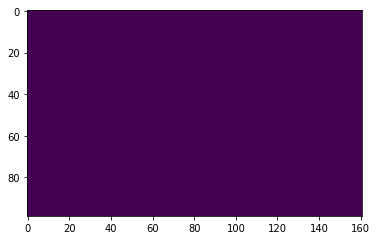

In [124]:
plt.imshow(np.zeros((1,99,161))[0,:,:])

1

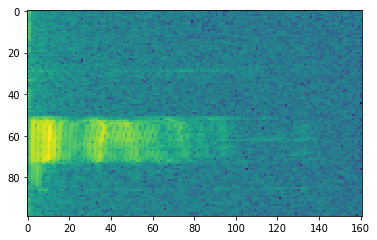

In [115]:

i_n = np.random.random_integers(0,len(noise_files) - 1)

samplerate, bg_wav  = wavfile.read(noise_files[i_n])
samplerate, wav = wavfile.read(sample_audio[0])

start_ = np.random.random_integers(bg_wav.shape[0]-16000)
bg_slice = bg_wav[start_ : start_+16000]
wav_with_bg = wav
wav_with_bg = wav_with_bg * np.random.uniform(0.8, 1.2) + bg_slice * np.random.uniform(0, 0.1)

_, zz = log_specgram(wav_with_bg, samplerate)
plt.imshow(zz)

In [4]:
from sklearn.preprocessing import OneHotEncoder
df = pd.DataFrame({'target' : np.array(['a', 'b', 'c', 'd', 'a', 'c', 'a', 'b', 'd'])})
labels = df['target'].unique().tolist()
dict_ = {x:i for i, x in enumerate(labels)}
df['labeled_' + 'target'] = df['target'].map(dict_)

# enc.fit(df['labeled_' + 'target'].values)  

In [6]:
smarties = get_smarties.Smarties()
smarties.fit_transform(df[['target']])

,target_a,target_b,target_c,target_d
0,1,0,0,0
1,0,1,0,0
2,0,0,1,0
3,0,0,0,1
4,1,0,0,0
5,0,0,1,0
6,1,0,0,0
7,0,1,0,0
8,0,0,0,1


In [8]:

df_new = pd.DataFrame({'target' : ['a', 'd']})
smarties.transform(df_new[['target']])

Success


,target_a,target_b,target_c,target_d
0,1,0,0,0
1,0,0,0,1
